In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

In [3]:
data = pd.read_csv('gld_price_data.csv')

In [4]:
data.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\saksh\AppData\Local\Temp\ipykernel_18680\4202926696.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

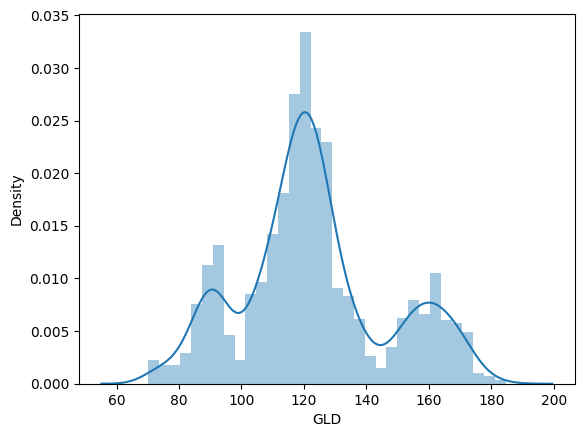

In [9]:
#Distribution

sns.distplot(data['GLD'])

In [10]:
#Splitting the Features and Target

In [11]:
X = data.drop(['Date','GLD'],axis=1)
Y= data['GLD']

In [12]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [13]:
X.corr()

,SPX,USO,SLV,EUR/USD
SPX,1.000000,-0.591573,-0.274055,-0.672017
USO,-0.591573,1.000000,0.167547,0.829317
SLV,-0.274055,0.167547,1.000000,0.321631
EUR/USD,-0.672017,0.829317,0.321631,1.000000


In [26]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [16]:
#Model Training : RandomForestRegressor



In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# Training the Model
regressor.fit(X_train,Y_train)
pred = regressor.predict(X_test)

In [19]:
# Model Evaluation
#print(Y_test,pred)

In [20]:
# prediction on Test Data

In [21]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.66209917  82.09540008 116.05070008 127.73610086 120.54490138
 154.78229813 150.34889844 126.13950009 117.52889896 126.15300055
 116.67350085 171.43490066 141.46709831 168.06639861 115.08350037
 117.65230065 140.04740235 169.92560082 159.8042031  160.42909949
 155.14459998 125.02580046 176.32129874 157.57810305 125.3122005
  93.80539957  77.39090012 120.82980004 119.09279922 167.52579941
  88.27300015 125.40820029  91.17240065 117.66020018 121.08839902
 136.10190113 115.45560112 114.96080089 147.12259993 107.37340135
 104.6382024   87.24909805 126.45530067 117.96069983 153.36509947
 119.53820046 108.4460002  108.28859866  93.19200037 127.10479808
  74.72320039 113.70999918 121.55669991 111.12399937 118.87629903
 120.4038995  159.07470114 167.63060134 147.09799697  85.67039854
  94.3218004   86.87689907  90.53790015 118.9403007  126.46610032
 127.4669     169.92890038 122.28879928 117.39909882  98.51120011
 168.760201   142.93449744 132.38400308 121.11920197 121.24239953
 119.806100

In [22]:
# R Squared error

score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error : " ,score)

R Squared error :  0.989804600258599


In [23]:
# Compare Actual Values and Predicted Values 

In [24]:
Y_test = list(Y_test)

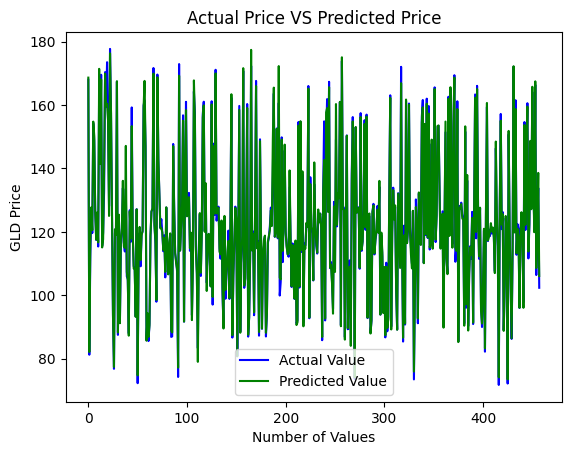

In [25]:
plt.plot(Y_test, color='blue' , label='Actual Value')
plt.plot(test_data_prediction , color='green' ,label='Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:
import pickle

In [29]:
pickle.dump(regressor,open("gold_price_predictor.pkl","wb"))

In [31]:
#pickle.dump(model,open("gold_price_predictor_model.pkl","wb"))